In [5]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
import pandas_datareader.data as pdr

import datetime

import fix_yahoo_finance as yf
yf.pdr_override()


# For division
from __future__ import division

C:\Users\Jatin Jain\PycharmProjects\virtualenv\lib\site-packages\fix_yahoo_finance\__init__.py:43: DeprecationWarning: 
    Auto-overriding of pandas_datareader's get_data_yahoo() is deprecated and will be removed in future versions.
    Use pdr_override() to explicitly override it.
  DeprecationWarning)


In [3]:
# Set up End and Start times for data grab
start = datetime.datetime(2016, 5, 1)
end = datetime.date.today()

# Set DataFrame as the Stock Ticker
Apple = pdr.get_data_yahoo('AAPL',start,end)
Microsoft = pdr.get_data_yahoo('MSFT',start,end)
Facebook = pdr.get_data_yahoo('FB',start,end)
Google = pdr.get_data_yahoo('GOOG',start,end)

[                       0%                       ]

[*********************100%***********************]  1 of 1 downloaded

[                       0%                       ]

[*********************100%***********************]  1 of 1 downloaded

[                       0%                       ]

[*********************100%***********************]  1 of 1 downloaded

[                       0%                       ]

[*********************100%***********************]  1 of 1 downloaded

In [70]:
Apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 299 entries, 2016-05-02 to 2017-07-07
Data columns (total 10 columns):
Open              299 non-null float64
High              299 non-null float64
Low               299 non-null float64
Close             299 non-null float64
Adj Close         299 non-null float64
Volume            299 non-null int32
MA for 10 days    290 non-null float64
MA for 20 days    280 non-null float64
MA for 50 days    250 non-null float64
Daily Return      298 non-null float64
dtypes: float64(9), int32(1)
memory usage: 24.5 KB


In [5]:
Apple.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-05-02,93.970001,94.080002,92.400002,93.639999,91.324463,48160100
2016-05-03,94.199997,95.739998,93.680000,95.180000,92.826378,56831300
2016-05-04,95.199997,95.900002,93.820000,94.190002,91.860863,41025500
2016-05-05,94.000000,94.070000,92.680000,93.239998,91.487999,35890500
2016-05-06,93.370003,93.449997,91.849998,92.720001,90.977768,43458200


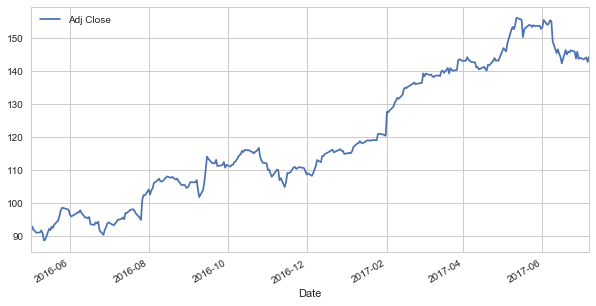

In [65]:
Apple['Adj Close'].plot(legend=True,figsize=(10,5),grid=True)

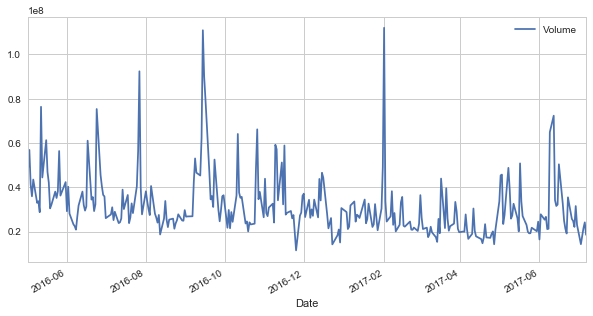

In [64]:
Apple['Volume'].plot(legend=True,figsize=(10,5),grid=True)

C:\Python27\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  """
C:\Python27\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  """
C:\Python27\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  """


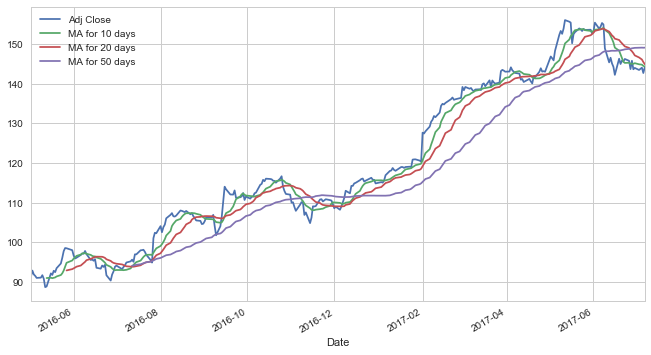

In [63]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    Apple[column_name]=pd.rolling_mean(Apple['Adj Close'],ma)
    
Apple[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False, figsize=(11,6), grid=True)

## Daily Return Analysis

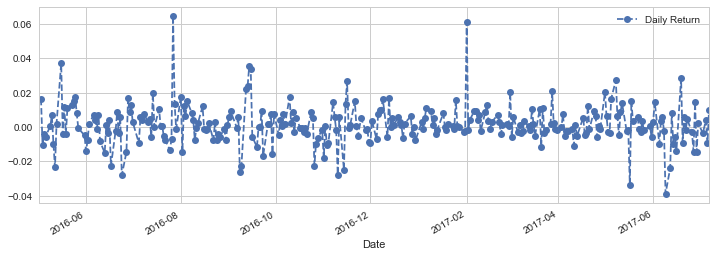

In [58]:
# We'll use pct_change to find the percent change for each day
Apple['Daily Return'] = Apple['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
Apple['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o', grid=True)

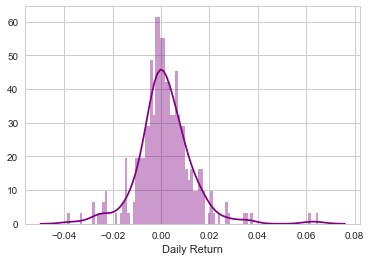

In [57]:
sns.distplot(Apple['Daily Return'].dropna(),bins=100,color='purple')

In [12]:
closing_dataf = pdr.get_data_yahoo(['AAPL','GOOG','MSFT','FB'],start,end)['Adj Close']

[                       0%                       ]

[**********************50%                       ]  2 of 4 downloaded

[**********************75%***********            ]  3 of 4 downloaded

[*********************100%***********************]  4 of 4 downloaded

[*********************100%***********************]  4 of 4 downloaded

In [13]:
closing_dataf.head()

,AAPL,FB,GOOG,MSFT
Date,,,,
2016-05-02,91.324463,118.570000,698.210022,49.032005
2016-05-03,92.826378,117.430000,692.359985,48.227882
2016-05-04,91.860863,118.059998,695.700012,48.315075
2016-05-05,91.487999,117.809998,701.429993,48.382893
2016-05-06,90.977768,119.489998,711.119995,48.818863


In [15]:
# Make a new tech returns DataFrame
tech_rets = closing_dataf.pct_change()

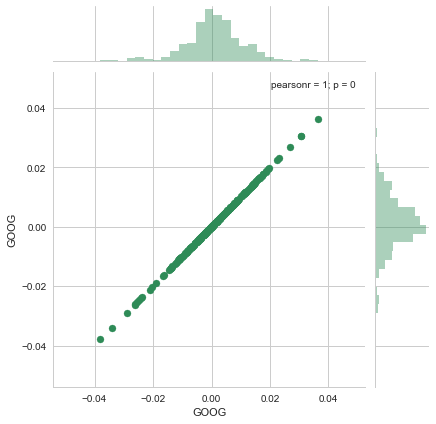

In [22]:
ax = sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

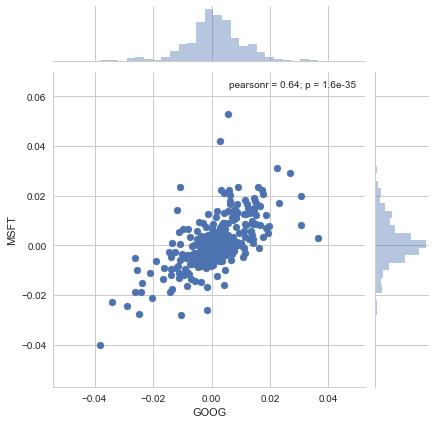

In [23]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

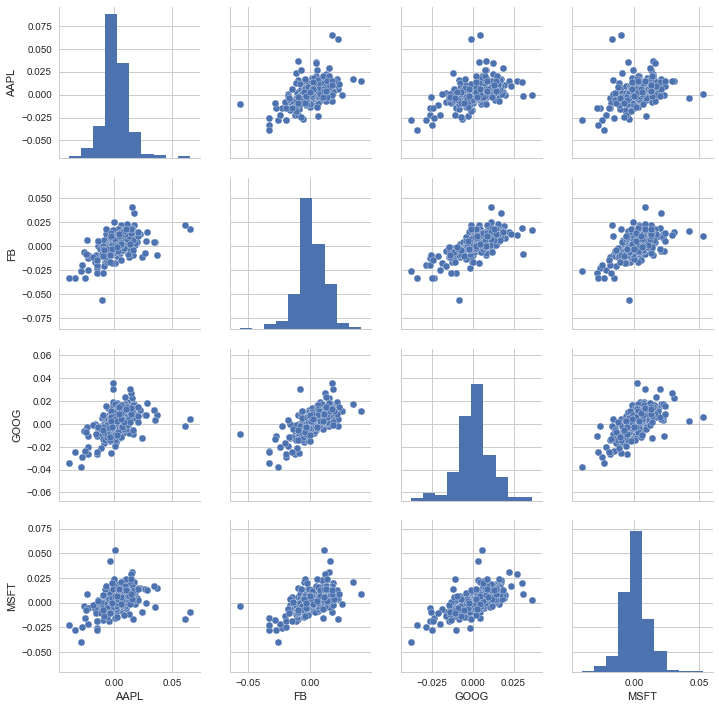

In [71]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
ax = sns.pairplot(tech_rets.dropna())

In [76]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
ax = sns.heatmap(data=tech_rets.dropna(), annot=True)
ax

## Risk Analysis

In [11]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([-0.01,0.025])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

NameError: name 'tech_rets' is not defined

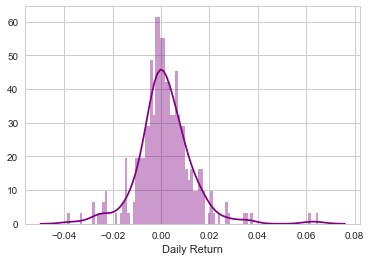

In [50]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(Apple['Daily Return'].dropna(),bins=100,color='purple')

In [51]:
# The 0.05 empirical quantile of daily returns
rets['AAPL'].quantile(0.05)

-0.014845119925140187

In [10]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in xrange(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

NameError: name 'rets' is not defined

In [9]:
# Get start price from GOOG.head()
start_price = 569.85

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.show()

NameError: name 'stock_monte_carlo' is not defined

In [120]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in xrange(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

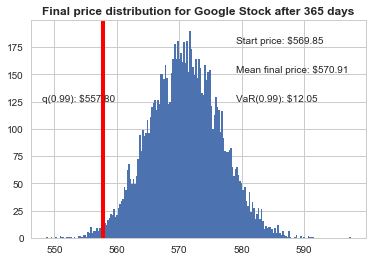

In [56]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');